In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [25]:
data = pd.read_csv("malicious_phish.csv")
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


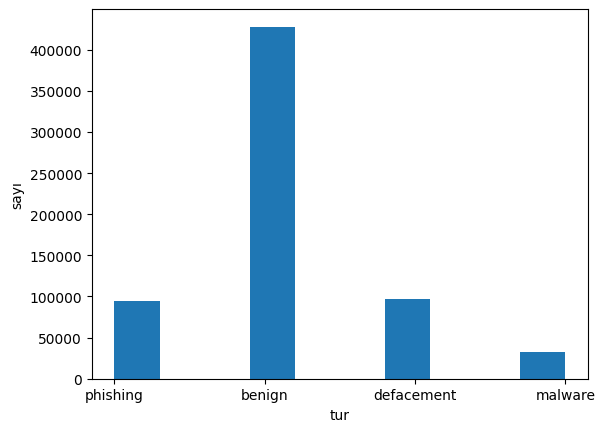

In [26]:
plt.hist(data["type"])
plt.xlabel("tur")  
plt.ylabel("sayı")  
plt.show()  

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data['url'], data['type'], test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(520952,) (130239,) (520952,) (130239,)


## Verilerin sayılara dönütürülmesi

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

X_train_pad = pad_sequences(X_train_seq)
X_test_pad = pad_sequences(X_test_seq)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=X_train_pad.shape[1]))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [34]:
from tensorflow import keras
from tensorflow.keras.layers  import Bidirectional , Dropout , Activation , LSTM , Dense
from tensorflow.keras.models import Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [35]:
dropout = 0.2
seg_len=60
window_size = seg_len - 1

model = Sequential()
model.add(LSTM(window_size , return_sequences= True , input_shape=(window_size,x_train.shape[-1])))
model.add(Dropout(dropout))
model.add(Bidirectional(LSTM((window_size * 2 ), return_sequences=True)))
model.add(Dropout(dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=True)))
model.add(Dense(units = 1))
model.add(Activation('linear'))

model.compile(optimizer='adam', loss='mean_squared_error',metrics= 'accuracy')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 59, 59)            122958832 
                                                                 
 dropout (Dropout)           (None, 59, 59)            0         
                                                                 
 bidirectional (Bidirection  (None, 59, 236)           168032    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 59, 236)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 59, 118)           139712    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 59, 1)            